**Importing modules and libraries**

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from matplotlib.patches import Rectangle
from pprint import pprint as pp
import csv
from pathlib import Path
from itertools import product
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor , Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

**Loading the training dataset**

In [4]:
data_train = pd.read_csv("fraudTrain.csv")
data_train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Initial analysis
Initial analysis has three parts.
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
We will analyse the behaviour of each variable, source of variable, assigne the correct data type and appropriate column name. For numerical variable, we can use five number summary and for categorical variable, we will check the levels and frequencies. Check if there are missing values, duplicates, errors or inconsistencies in data values of each variable. At this stage, we also detect outliers using boxplot and decide the treatment of outliers.

In [4]:
data_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
data_train.describe(include= 'all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN
top,NaN,2020-06-02 12:47:07,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,864 Reynolds Plains,...,NaN,NaN,NaN,Film/video editor,1977-03-23,4a9b61b1c5e3854b64cde84b19678da9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

**Description of Variables**
- Unamed: This is first column works as counter for number of observations.
- 'trans_date: The date when this transaction occurred.
- 'trans_time': The date when this transaction occurred.
- 'cc_num': Credit card number
- 'merchant': The name of company or merchant 
- ‘category': The category of business or merchant
- 'amt': The amount of transaction
- 'first': First name of customer
- 'last': Last name of customer
- 'gender': Gender of customer
- 'street', 'city', 'state', 'zip': Theses four variables describe the street, city, state and zip code of customer address
- 'lat', 'long': These two variables describe the latitude and longitude of customer location
- 'city_pop': The population of city where customer lives
-'job': The job of customer
-'dob': Date of birth of customer
-'trans_num': The transaction number
-'unix_time': The unix time stamp is a way to track time as a running total of seconds. This count starts at the Unix Epoch on January 1st, 1970 at UTC. The unix_time describes the time duration in seconds between a particular date and the Unix Epoch.
merch_lat', 'merch_long': These two variables describe the latitude and longitude of merchant/ business location.
-'is_fraud': The class variable which identifies a transaction is a fraud or not. This is a binary variable where 0 is for no and 1 is for yes.


**Loading the test dataset**

In [7]:
data_test = pd.read_csv("fraudTest.csv") # use sep="," for coma separation. 
data_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
data_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
#features_cols = ['category', 'amt', 'gender', 'lat', 'long', 'job', 'age','merch_lat', 'merch_long', 'is_fraud']

**Check missing values**

In [11]:
# Check missing values
data_train.isnull().sum().sort_values(ascending=False)

is_fraud                 0
city                     0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
state                    0
merch_long               0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
Unnamed: 0               0
dtype: int64

In [12]:
data_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [96]:
nRow, nCol = data_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1296675 rows and 23 columns


In [14]:
# Check missing values
data_test.isnull().sum().sort_values(ascending=False)

is_fraud                 0
city                     0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
state                    0
merch_long               0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
Unnamed: 0               0
dtype: int64

In [15]:
data_test.loc[data_test.isnull().any(axis=1)]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [16]:
data_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [97]:
nRow, nCol = data_test.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 555719 rows and 23 columns


**Imbalance in Data**

In [18]:
# Count the occurrences of fraud and no fraud in trainning data and print them
occ = data_train['is_fraud'].value_counts()
occ

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [19]:
# Print the ratio of fraud cases in trainning data
ratio_cases = occ/len(data_train.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.005788651743883394
Ratio of non-fraudulent cases: 0.9942113482561166


The ratio of fraudulent transactions is very low. This is a case of class imbalance problem, and we will deal with this in the next sections.

Text(0, 0.5, 'Frequency')

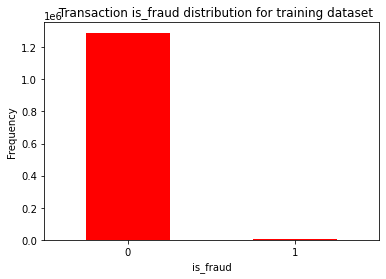

In [20]:
count_classes = pd.value_counts(data_train['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color="r")
plt.title("  Transaction is_fraud distribution for training dataset")
#plt.xticks(range(2), LABELS)
plt.xlabel("is_fraud")
plt.ylabel("Frequency")

In [21]:
# Count the occurrences of fraud and no fraud in test data and print them
occ = data_test['is_fraud'].value_counts()
occ

0    553574
1      2145
Name: is_fraud, dtype: int64

In [22]:
# Print the ratio of fraud cases in test data
ratio_cases = occ/len(data_test.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.0038598644278853163
Ratio of non-fraudulent cases: 0.9961401355721147


Text(0, 0.5, 'Frequency')

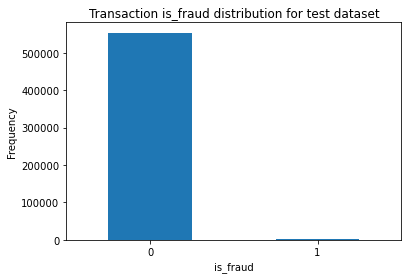

In [23]:
count_classes = pd.value_counts(data_test['is_fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction is_fraud distribution for test dataset")
plt.xlabel("is_fraud")
plt.ylabel("Frequency")

In [24]:
#Let's create a list for our categorical columns for Train and Test dataset, we need this later
cat_cols=['trans_date_trans_time', 'cc_num', 'merchant', 'category',
        'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long']

In [27]:
#data_test.loc[data_test.isnull().any(axis=1)]

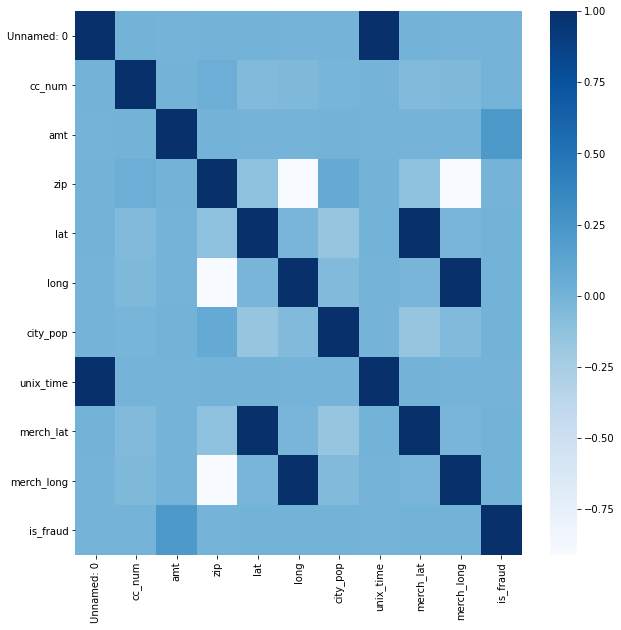

In [5]:
fig=plt.figure(figsize= (10,10)) 
sns.heatmap(data_train.corr(), cmap='Blues')
plt.show()

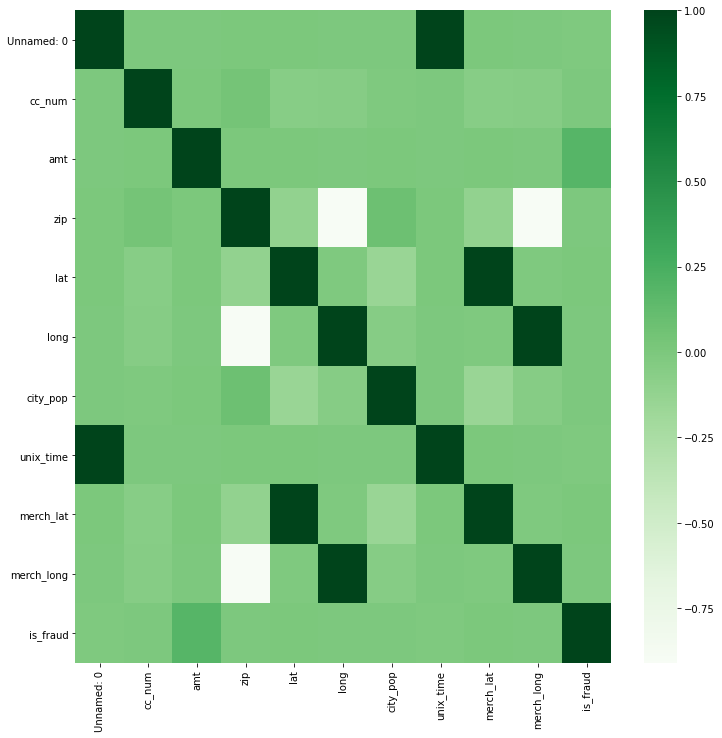

In [101]:
fig=plt.figure(figsize= (12,12)) 
sns.heatmap(data_test.corr(), cmap='Greens')
plt.show()

**Merging train and test dataset into one dataset**

In [8]:
#Concatenate the splitted data
df = pd.concat([data_train,data_test],ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [32]:
#Shape of the data (rows,columns)
df.shape

(1852394, 22)

In [33]:
#Finding dtypes and other basic info about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [89]:
# We can find age of customer using dob, since age could be more important in finding a pattern or association of input variable (age) and output variable (is_fraud).
# customer age= tans_date - dob of customer

In [74]:
# Converting trans_date_trans_time from string to date time format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [75]:
df['trans_date_trans_time']

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1852389   2020-12-31 23:59:07
1852390   2020-12-31 23:59:09
1852391   2020-12-31 23:59:15
1852392   2020-12-31 23:59:24
1852393   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 1852394, dtype: datetime64[ns]

In [76]:
#Converting dob from string to date time format
df['dob'] = pd.to_datetime(df['dob'])

In [77]:
# Adding a new variable called 'age' for the age of each customer
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age']

0          31.0
1          41.0
2          57.0
3          52.0
4          33.0
           ... 
1852389    55.0
1852390    21.0
1852391    39.0
1852392    55.0
1852393    28.0
Name: age, Length: 1852394, dtype: float64

In [88]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,gender_le,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,31.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,41.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,57.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,52.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,33.0


# Univariate Analysis

## Amount of Transaction

In [79]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


Fraud Transaction mean is way higher than non-fraud transaction

Mean of Non Fraud Transactions: 67.6

Mean of Fraud Transactions: 530.6

## Gender

In [10]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,1014749,54.780408
1,M,837645,45.219592


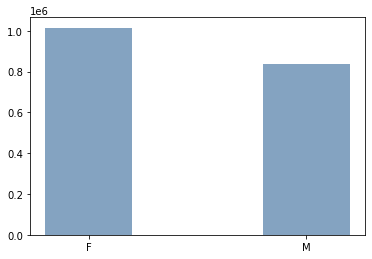

In [11]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [12]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


## Category

In [14]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,188029,10.150594
4,grocery_pos,176191,9.511529
6,home,175460,9.472067
12,shopping_pos,166463,8.986371
7,kids_pets,161727,8.730702
11,shopping_net,139322,7.521186
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
10,personal_care,130085,7.022534
5,health_fitness,122553,6.615925


gas_transport holds for 10% of the transactions

In [15]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

,index,Category,category_count,percent
0,2,gas_transport,188029,10.150594
1,4,grocery_pos,176191,9.511529
2,6,home,175460,9.472067
3,12,shopping_pos,166463,8.986371
4,7,kids_pets,161727,8.730702
5,11,shopping_net,139322,7.521186
6,0,entertainment,134118,7.240252
7,1,food_dining,130729,7.057300
8,10,personal_care,130085,7.022534
9,5,health_fitness,122553,6.615925


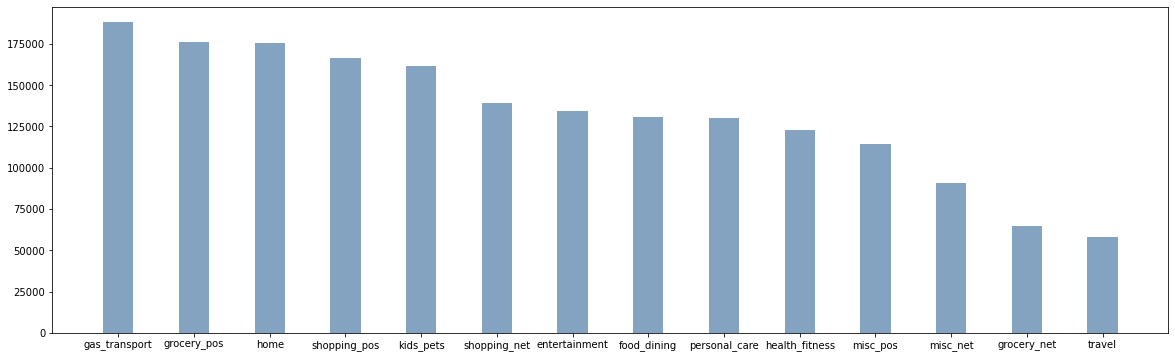

In [16]:
fig = plt.figure(figsize = (20, 6)) 
plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)
plt.show()

In [18]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']
df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')
df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100

In [19]:
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

,Category,is_fraud,count,category_count,percent,percent_grp
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537
13,home,1,265,175460,9.472067,0.151032
12,home,0,175195,175460,9.472067,99.848968
25,shopping_pos,1,1056,166463,8.986371,0.634375
24,shopping_pos,0,165407,166463,8.986371,99.365625
14,kids_pets,0,161423,161727,8.730702,99.812029
15,kids_pets,1,304,161727,8.730702,0.187971


grocery_pos and shopping_net has more number of fraud transactions compared to other categories

In [20]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
11,health_fitness,1,185,122553,6.615925,0.150955
13,home,1,265,175460,9.472067,0.151032
3,food_dining,1,205,130729,7.057300,0.156813
15,kids_pets,1,304,161727,8.730702,0.187971
1,entertainment,1,292,134118,7.240252,0.217719
21,personal_care,1,290,130085,7.022534,0.222931
27,travel,1,156,57956,3.128708,0.269170
7,grocery_net,1,175,64878,3.502387,0.269737
19,misc_pos,1,322,114229,6.166561,0.281890
5,gas_transport,1,772,188029,10.150594,0.410575


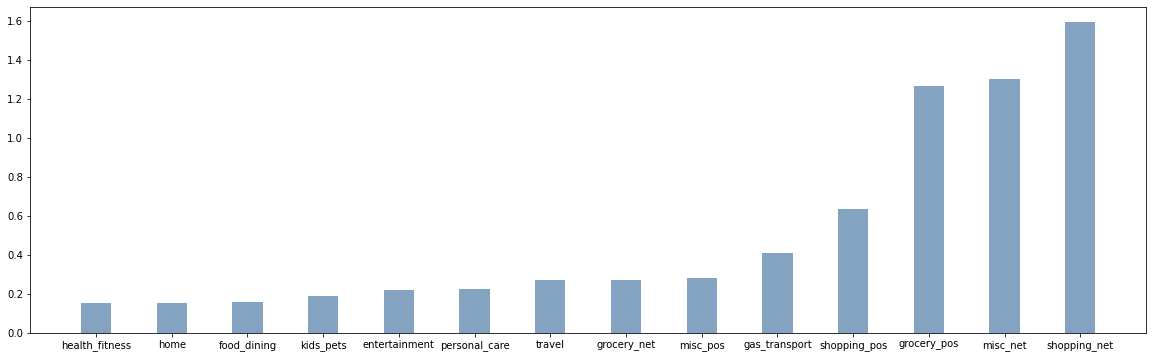

In [21]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

# Data Visulization

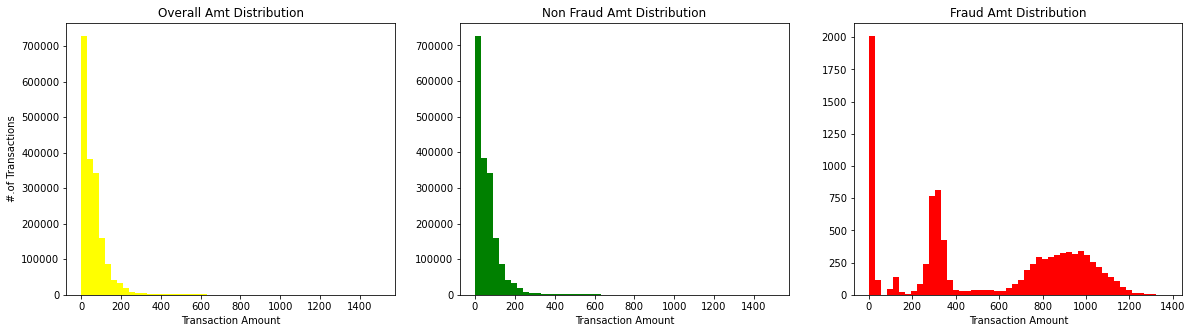

In [86]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50,color='yellow')
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50, color='green')
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50, color='red')

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

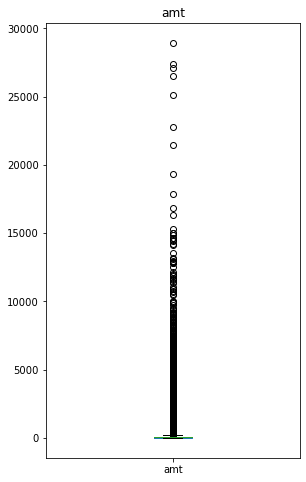

In [87]:
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df[col].plot.box()
    plt.title(col)
plt.show()

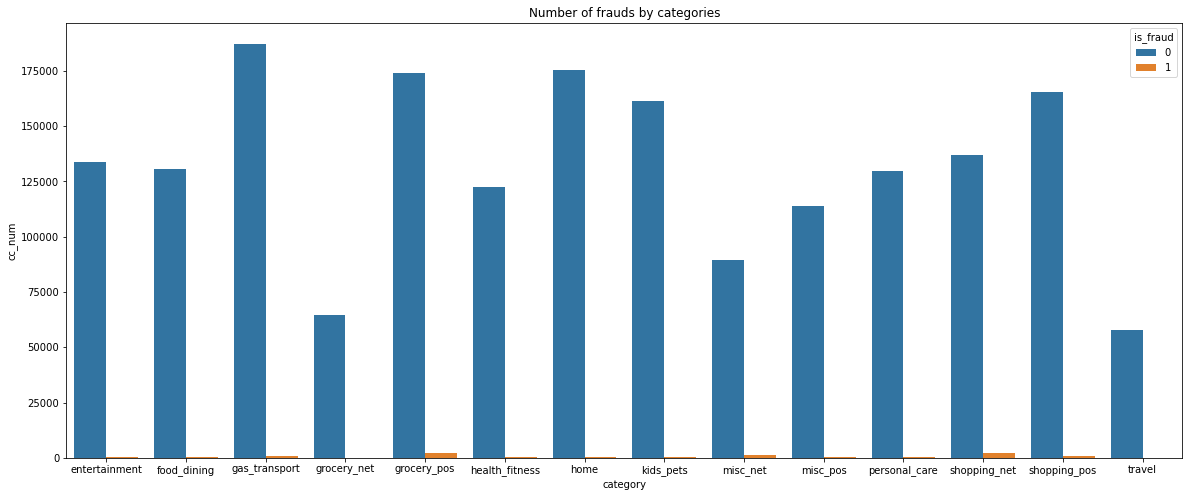

In [90]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by categories')
sns.barplot(x="category", y='cc_num' ,hue="is_fraud", data=df.groupby(['category','is_fraud']).agg({'cc_num':'count'}).reset_index())

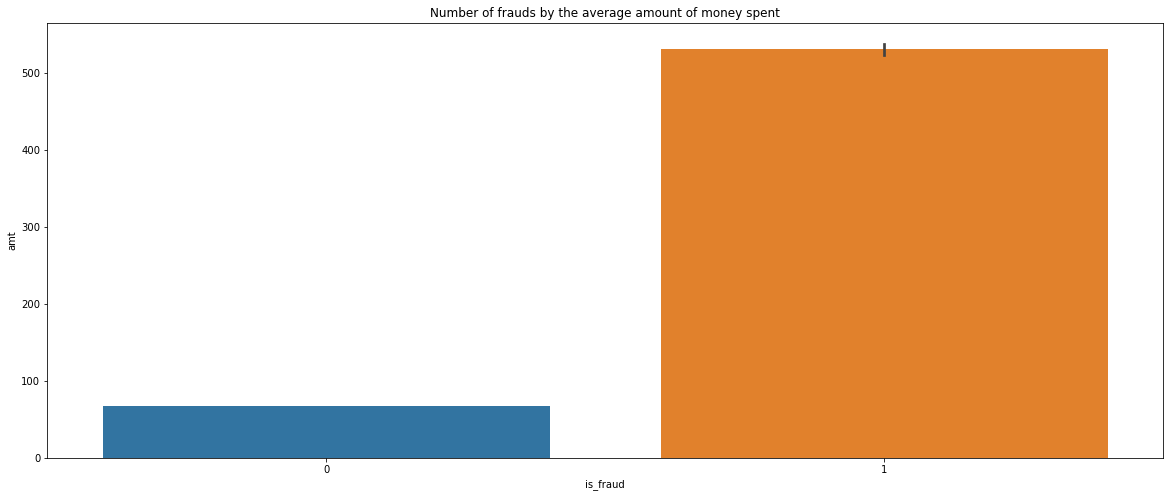

In [92]:
plt.figure(figsize=(20,8))
plt.title('Number of frauds by the average amount of money spent')
sns.barplot(x="is_fraud", y='amt', data=df)

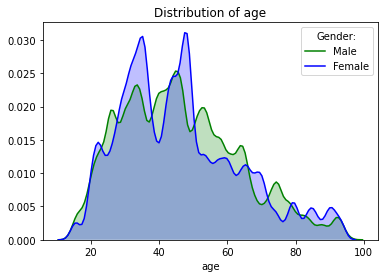

In [93]:
fig, ax = plt.subplots()
sns.distplot(df.loc[df.gender=='M', 'age'].dropna(),hist=False, color='green', kde_kws={"shade": True},ax=ax, label='Male')
sns.distplot(df.loc[df.gender=='F', 'age'].dropna(),hist=False, color='blue',kde_kws={"shade": True},ax=ax, label='Female')
ax.set_title('Distribution of age')
ax.legend(title='Gender:')

**Bivariate Analysis**

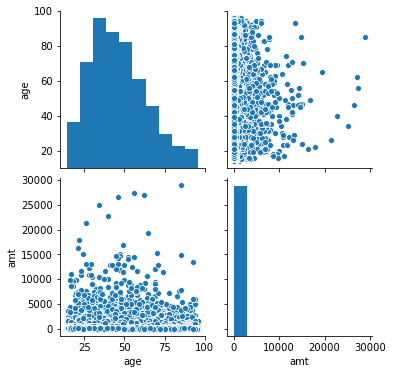

In [94]:
sns.pairplot(df[['age', 'amt']])

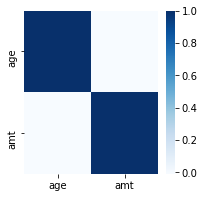

In [105]:
fig=plt.figure(figsize= (3,3)) 
sns.heatmap(df[['age','amt']].corr(), cmap='Blues')
plt.show()

In [106]:
df[['age','amt']].corr()

,age,amt
age,1.000000,-0.010738
amt,-0.010738,1.000000


In [35]:
#dividing data into categorical and numerical
df_cat = df.select_dtypes(include = 'object')
df_num = df.select_dtypes(exclude = 'object')
le = LabelEncoder()

In [36]:
nan_df = pd.DataFrame(data = (df.isnull().sum()/len(df))*100,columns = ['% of missing values'])

In [37]:
nan_df

,% of missing values
trans_date_trans_time,0.0
cc_num,0.0
merchant,0.0
category,0.0
amt,0.0
first,0.0
last,0.0
gender,0.0
street,0.0
city,0.0


In [38]:
df['gender_le']  = le.fit_transform(df['gender'])

In [ ]:
#from feature_engine.encoding import WoEEncoder, RareLabelEncoder


In [39]:
# Seperating  numerical from nominal
# cutting off some data to avoid heavy cpu usage
df2 = df.select_dtypes(exclude = 'object')
df2 = df2.loc[:149999]

In [40]:
df2.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,gender_le
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1


In [41]:
# dropping the feature which is not useful for data analysis
df2 = df2.drop(['cc_num'],axis=1)
# seperating target and independent features
x = df2.drop('is_fraud',axis=1)
y = df2['is_fraud']

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7 , random_state = 10)

In [43]:
df_num = df_num.drop(['cc_num'],axis=1)

In [44]:
df_num = df_num.drop('is_fraud',axis=1)

In [45]:
# Scaling the data
ss = StandardScaler()
xtrain[df_num.columns] = ss.fit_transform(xtrain[df_num.columns])
xtest[df_num.columns] = ss.fit_transform(xtest[df_num.columns])

In [46]:
#Building a Logistic Regression Model

lr = LogisticRegression()
model_v1 = lr.fit(xtrain,ytrain)

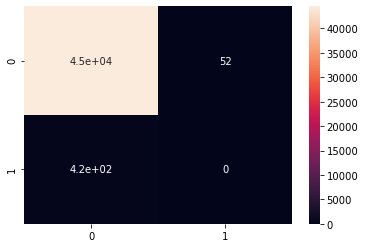

In [47]:
#  predict and confusion matrix

ypred = model_v1.predict(xtest)
cm  = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [48]:
#classification report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44582
           1       0.00      0.00      0.00       418

    accuracy                           0.99     45000
   macro avg       0.50      0.50      0.50     45000
weighted avg       0.98      0.99      0.99     45000



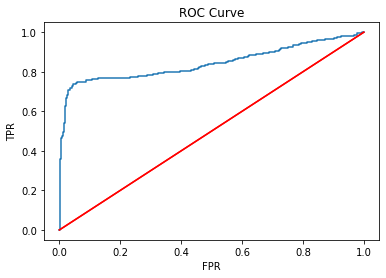

In [52]:
#### ROC curve
## Logistic Regression Model
prob = model_v1.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [53]:
#KNN model
knn = KNeighborsClassifier()
model_v2 = knn.fit(xtrain,ytrain)
ypred1 = model_v2.predict(xtest)

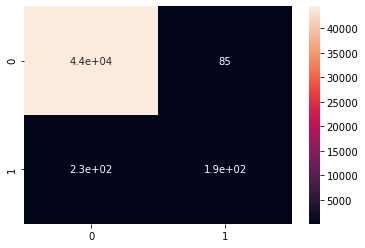

In [54]:
cm_knn = confusion_matrix(ytest,ypred1)
sns.heatmap(cm_knn,annot=True)

In [55]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     44582
           1       0.69      0.46      0.55       418

    accuracy                           0.99     45000
   macro avg       0.84      0.73      0.77     45000
weighted avg       0.99      0.99      0.99     45000



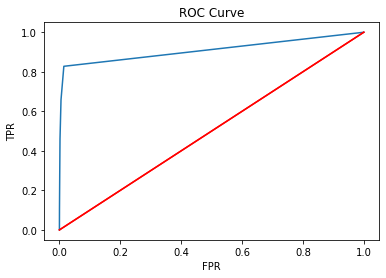

In [56]:
## KNN Classifier Model
prob1 = model_v2.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob1)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [57]:
#Naive Bayes model
nb =GaussianNB()
model_v3 = nb.fit(xtrain,ytrain)

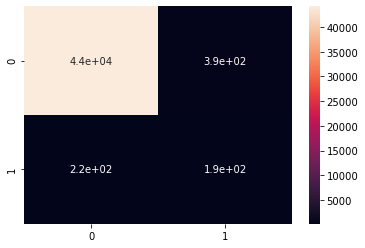

In [58]:
ypred = model_v3.predict(xtest)
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     44582
           1       0.33      0.46      0.38       418

    accuracy                           0.99     45000
   macro avg       0.66      0.73      0.69     45000
weighted avg       0.99      0.99      0.99     45000



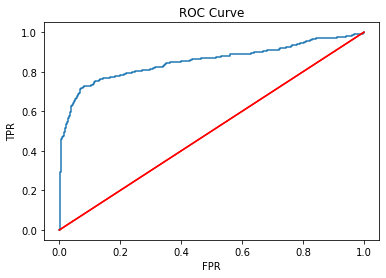

In [60]:
## Naive Bayes Model
prob2 = model_v3.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob2)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [62]:
## Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier() 
model_v4=classifier.fit(xtrain, ytrain) 
ypred=model_v4.predict(xtest)

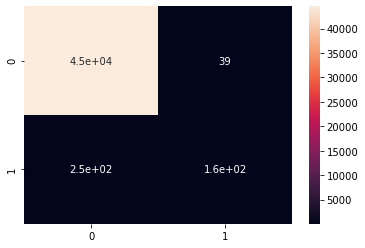

In [63]:
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

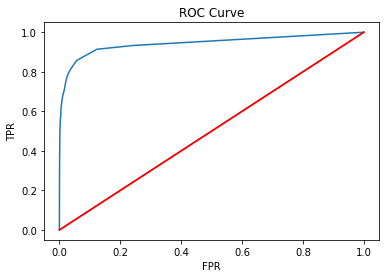

In [64]:
## Random Forest Classification Model
prob2 = model_v4.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,prob2)
#Plotting Roc Curve
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],color='red',linestyle = '-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [65]:
#Conclusion
#KNN Classifier gave the best ROC curve followed by Logistic Regression then Naive Bayes
#But when it comes to scores , I consider f1_weighted average score as the best one ; in that regard all 3 models gave 0.99 in classification report
#Since KNN Classifier had edge in ROC curve , I am concluding it is as the most reliable model to give a prediction out of the three models

# Prediction

In [66]:
ypred = model_v2.predict(xtest)

In [67]:
prediction = pd.DataFrame()
prediction['Serial No.'] = xtest.index
prediction['is_fraud_pred'] = ypred

In [68]:
prediction[prediction['is_fraud_pred']==1]

,Serial No.,is_fraud_pred
128,19284,1
171,18194,1
377,68138,1
504,147775,1
606,30159,1
...,...,...
43435,133861,1
43967,12587,1
44116,144908,1
44256,55678,1
